<a href="https://colab.research.google.com/github/lalitapatil/Blockchain-Data-Storage/blob/main/SkinCancer_ISIC2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
!nvidia-smi

Mon Dec 29 08:38:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [5]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]


In [6]:
train_path = '/content/drive/MyDrive/ISIC_2024_Resize224/train'
test_path  = '/content/drive/MyDrive/ISIC_2024_Resize224/test'

In [ ]:
#vgg = VGG16(
 #   input_shape=IMAGE_SIZE + [3],
 #   weights='imagenet',
 #   include_top=False
#)

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
from glob import glob

# Don't train existing weights
for layer in inception.layers:
    layer.trainable = False

# Useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ISIC_2024_Resize224/train/*')

In [12]:
from tensorflow.keras.layers import Flatten, Dense

# Add our own layers – you can add more if you want
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)


In [14]:
from tensorflow.keras.models import Model

# Create model object
model = Model(inputs=inception.input, outputs=prediction)

In [15]:
# View the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ISIC_2024_Resize224/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Output: Found 18548 images belonging to 15 classes.

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ISIC_2024_Resize224/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# Output: Found 1860 images belonging to 15 classes.

Found 12594 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ISIC_2024_Resize224/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Output: Found 18548 images belonging to 15 classes.

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ISIC_2024_Resize224/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# Output: Found 1860 images belonging to 15 classes.

Found 12594 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7660 - loss: 2.0464 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 4976s 13s/step - accuracy: 0.7661 - loss: 2.0451 - val_accuracy: 0.8330 - val_loss: 0.9714
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 190s 481ms/step - accuracy: 0.8195 - loss: 1.3807 - val_accuracy: 0.8545 - val_loss: 1.0654
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 191s 484ms/step - accuracy: 0.8423 - loss: 1.3273 - val_accuracy: 0.8280 - val_loss: 1.6667
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 188s 476ms/step - accuracy: 0.8535 - loss: 1.2709 - val_accuracy: 0.8475 - val_loss: 1.1063
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 187s 475ms/step - accuracy: 0.8629 - loss: 1.0826 - val_accuracy: 0.7755 - val_loss: 2.6561
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 191s 484ms/step - accuracy: 0.8631 - loss: 1.2318 - val_accuracy: 0.8005 - val_loss: 1.8193
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 190s 483ms/step - accuracy: 0.8539 - loss: 1.2765 - val_accuracy: 0.8720 - val_loss: 1.0167
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 204s 488ms/step - accuracy: 0.8656 - loss: 1.274

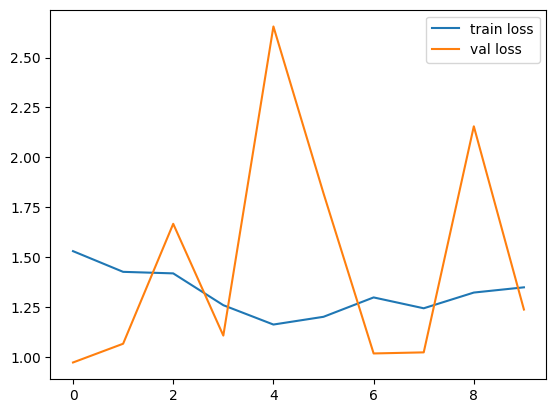

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
